# Name :SUNIL YADAV
# Data Science and Business Analytics at the Sparks Foundation #GRIPNOV20
# TASK 4 - Analysis of Global Terrorism 

**LETS IMPORT ALL THE REQUIRED LIBS..**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as p

In [22]:
#LETS GIVE OUR PATH OF DATASET
df = pd.read_csv("../input/terrorism/globalterrorismdb_0718dist.csv",encoding = 'ISO-8859-1')
df.head(7)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [23]:
df.shape

(181691, 135)

# **WE CAN SEE THAT WE HAVE 135 COLOUMS AND 181691 ROWS**

In [24]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [26]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

# AS WE CAN SEE WE HAVE LOTS OF MISSING VALUES

In [27]:
#LETS CHECK IT IN  PERCENTAGE 
missing_percentage = df.isnull().sum()*100 /len(df)
missing_percentage

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

In [28]:
df1 = df.country_txt.value_counts().reset_index().rename(columns={'index': 'Country Name'})
df1.columns.values[1] = 'Count of Attacks'
df1.head()

,Country Name,Count of Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


# **LETS EXPLORE DATA AND ANALYZE**

In [29]:
top_10 = df1.head(10)

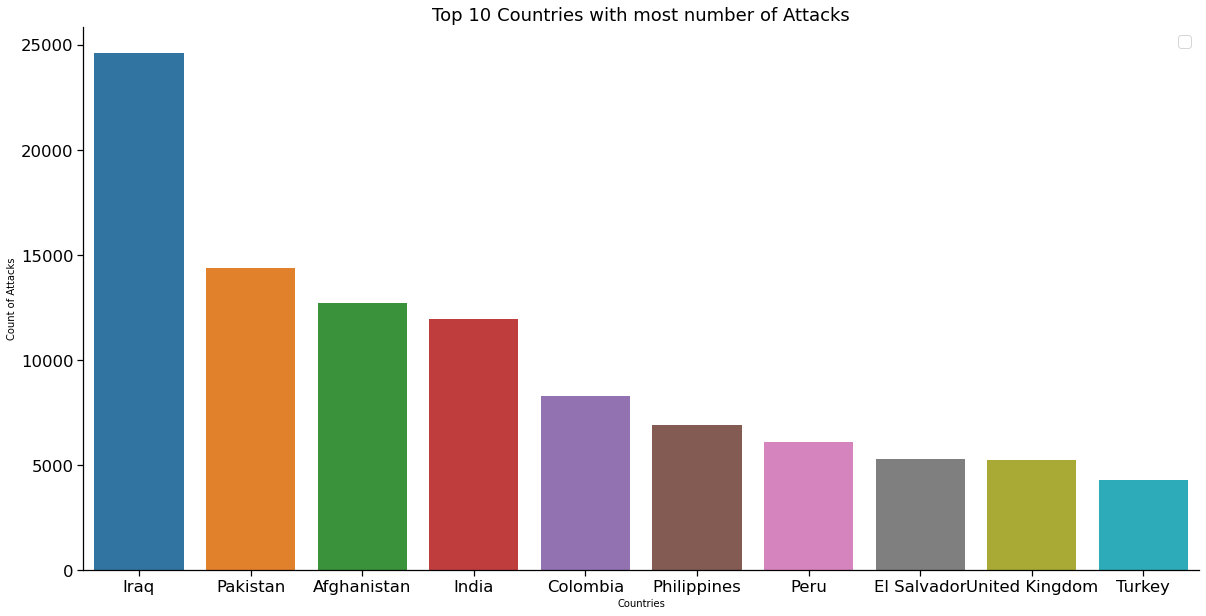

In [31]:
fig,ax = plt.subplots(figsize=(20, 10))
sb.despine()
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sb.barplot(x="Country Name", y="Count of Attacks", data=top_10)
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_title('Top 10 Countries with most number of Attacks')
ax.legend();

# We can see that Iraq has most number of attacks followed by Pakistan and Afganistan,
# ans India coming on number 4 with almost 11,960 attacks

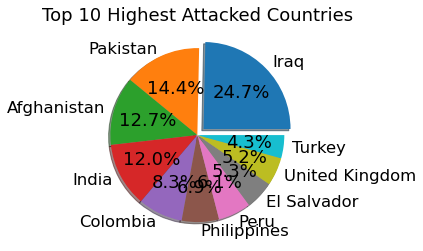

In [32]:
plt.title('Top 10 Highest Attacked Countries')
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(top_10['Count of Attacks'], labels=top_10['Country Name'],shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

In [33]:
top10=sum(top_10['Count of Attacks'])
world = sum(df1['Count of Attacks'])
print((top10/world)*100,"% top 10 mostly attacked countries have of total world's count of attacks")

54.95704245119462 % top 10 mostly attacked countries have of total world's count of attacks


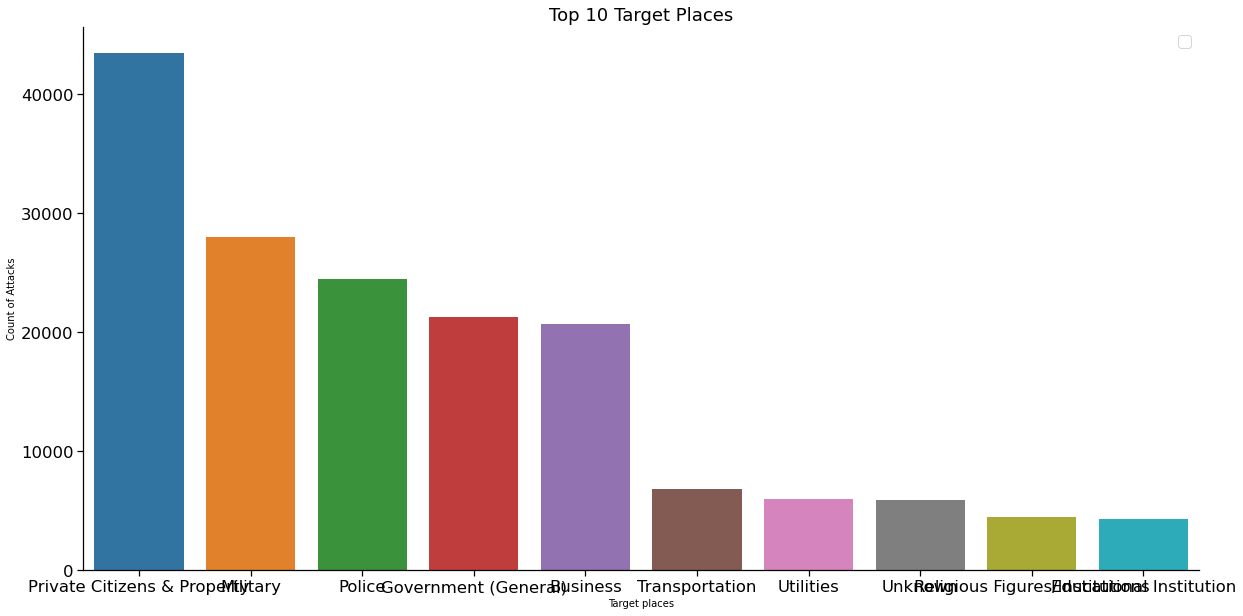

In [34]:
target_type= df['targtype1_txt'].value_counts().reset_index().rename(columns={'index': 'Target Types'})
target_type.columns.values[1] = 'Count'

fig,ax = plt.subplots(figsize=(20, 10))
sb.despine()
sb.barplot(x="Target Types", y="Count", data=target_type.head(10))
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize = 10)
ax.set_xlabel(xlabel = 'Target places', fontsize = 10)
ax.set_title('Top 10 Target Places')
ax.legend();

In [35]:
years= df['iyear'].value_counts().reset_index()
years.columns.values[1] = 'Count of Attacks'
years.head()

,index,Count of Attacks
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900


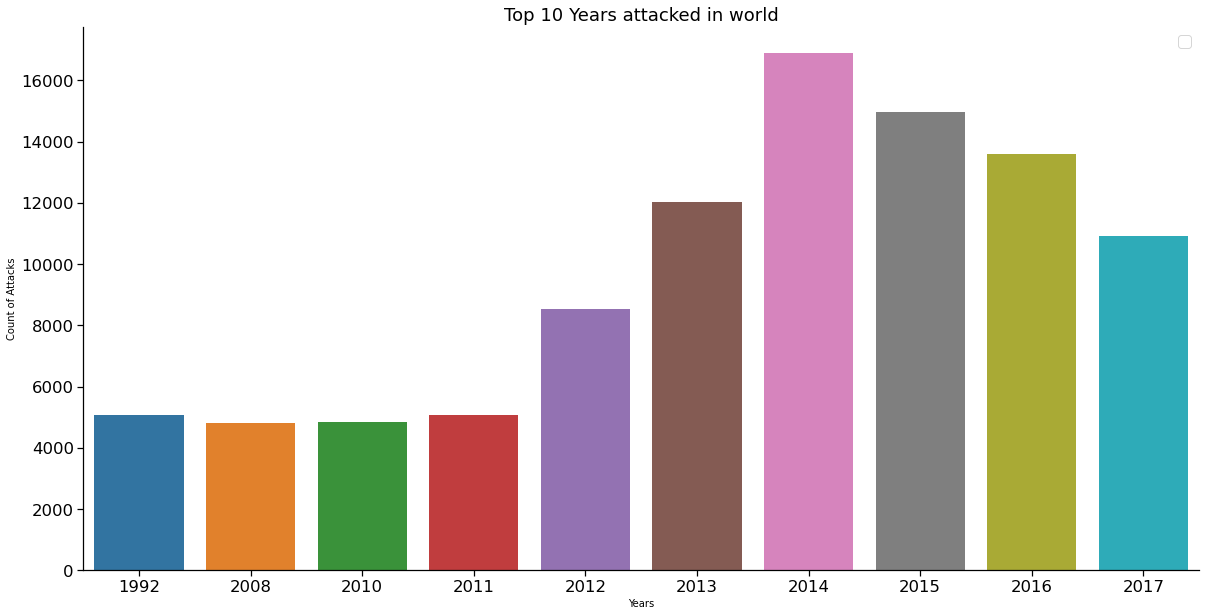

In [36]:
fig,ax = plt.subplots(figsize=(20, 10))
sb.despine()
sb.barplot(x="index", y="Count of Attacks", data=years.head(10))
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize = 10)
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_title('Top 10 Years attacked in world')
ax.legend();

In [37]:
weapons= df['weaptype1_txt'].value_counts().reset_index()
weapons.columns.values[1] = 'Count of Attacks'
weapons.shape

(12, 2)

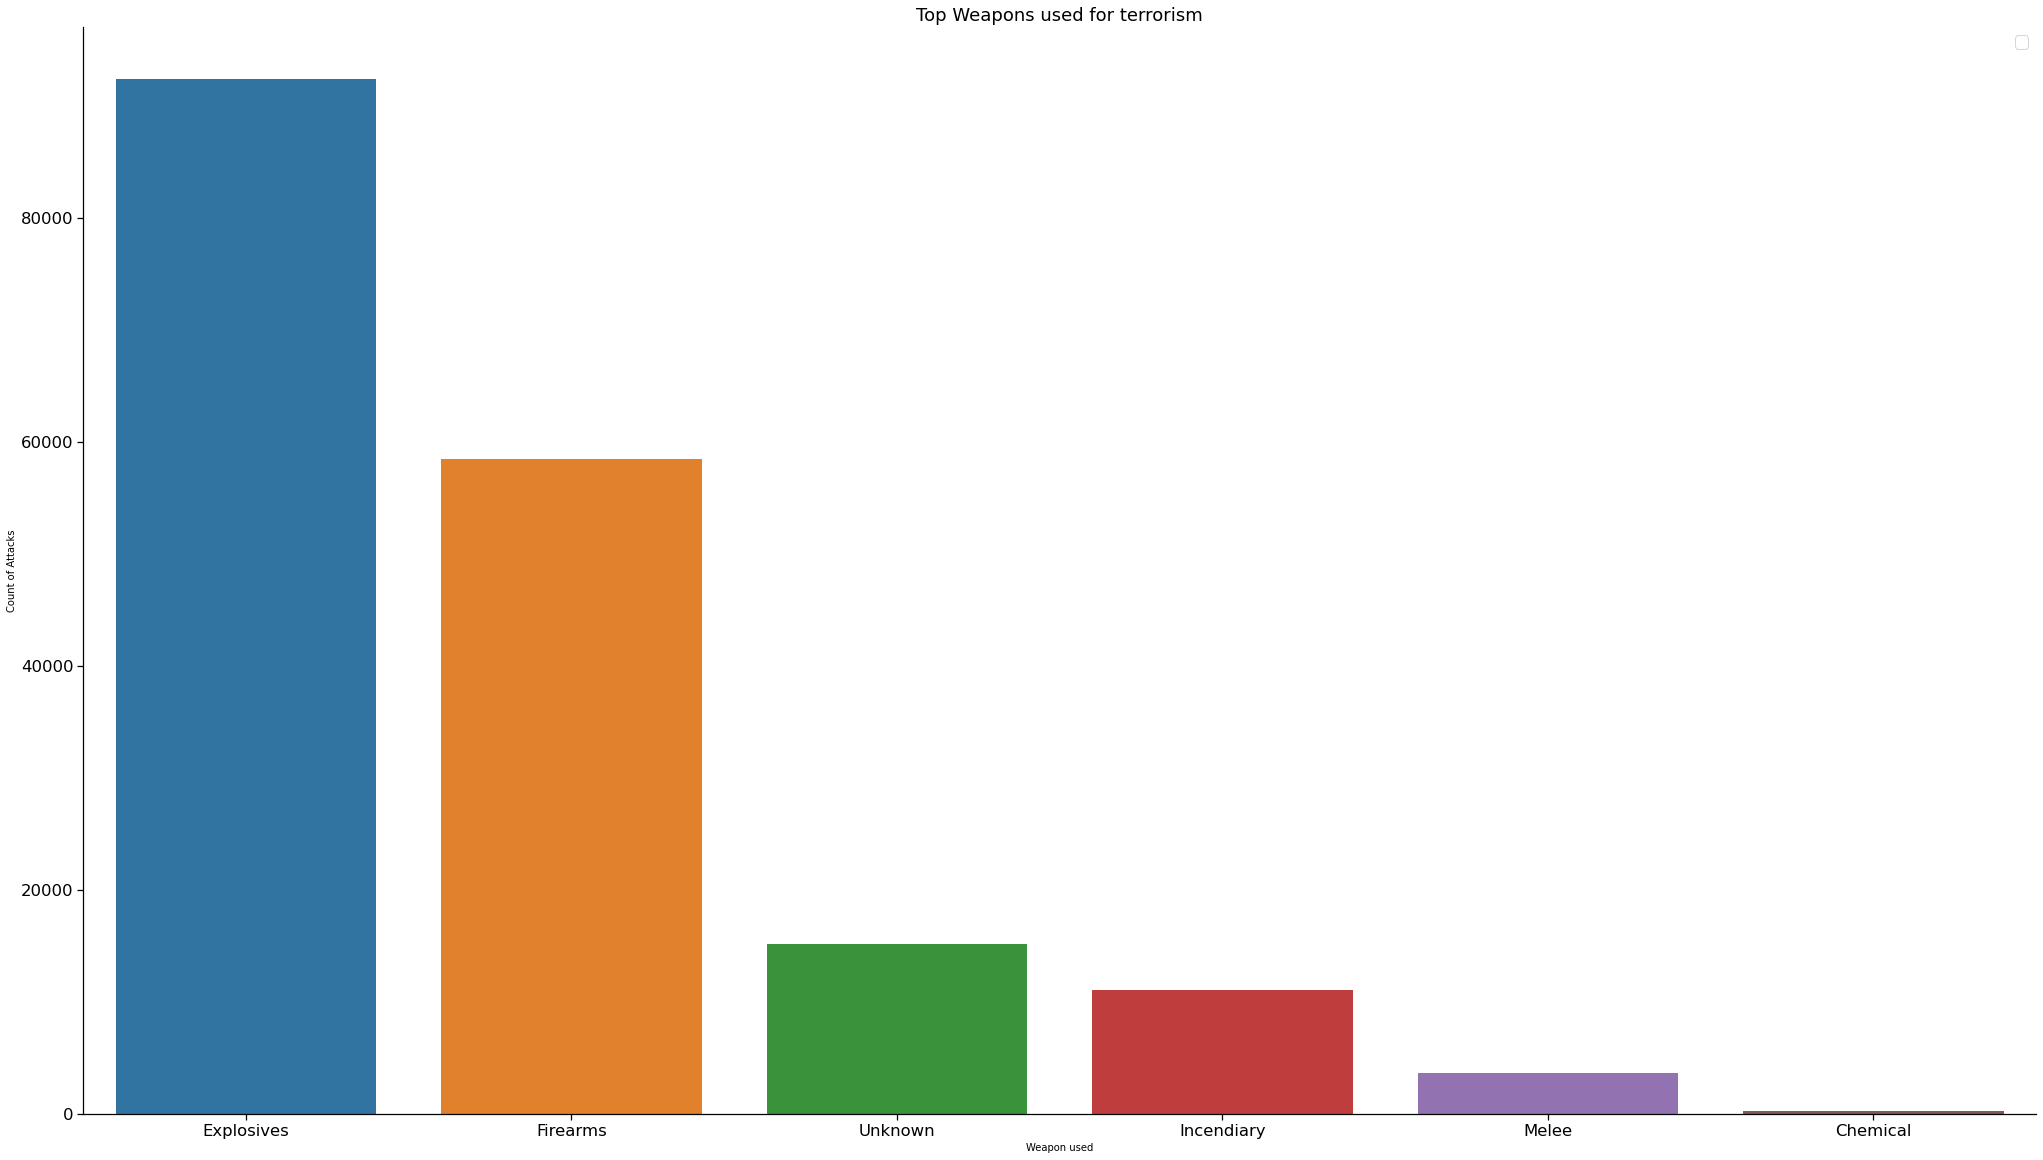

In [38]:
fig,ax = plt.subplots(figsize=(35, 20))
sb.despine()
sb.barplot(x="index", y="Count of Attacks", data=weapons.head(6))
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize = 10)
ax.set_xlabel(xlabel = 'Weapon used', fontsize = 10)
ax.set_title('Top Weapons used for terrorism')
ax.legend();

In [39]:
top_city = df.city.value_counts().reset_index().rename(columns={'index': 'City Name'})
top_city.columns.values[1] = 'Count of Attacks'
top_city = top_city.head(10)

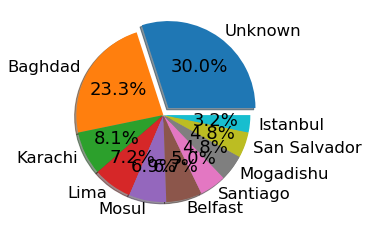

In [40]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(top_city['Count of Attacks'], labels=top_city['City Name'],shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

# Observations and Conclusion

# Top countries which have faced Terrorist attacks contains mostly Asian countries like Iraq,Pakistan,Afganistan,India and more

# Almost 54.9% attacks are faced by top 10 mostly attacked countries have of total world's count of attacks. Iraq having 24.7% attacks in world and "India" has 12% attacks

# Top Target places used for attacks are Private Citizens & Property, Military, Police, Government and Business.

# Mostly (Explosives, Firearms, Incendiary and Melee) weapons are used for terrorist attack

# From 2012, there is a sudden rise in terrorism, with 2014 having most number of terrorist attacks in world.

# Mostly Asian and Euporean cities are the hotspot for terrorism